In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [49]:
n = 10 #sample size
p = .80 #success rate
k = np.arange(0,11) #array of successes

In [50]:
from scipy.stats import binom
binomial = binom.pmf(k=k, n=n, p=p)

In [51]:
binomial

array([1.02400000e-07, 4.09600000e-06, 7.37280000e-05, 7.86432000e-04,
       5.50502400e-03, 2.64241152e-02, 8.80803840e-02, 2.01326592e-01,
       3.01989888e-01, 2.68435456e-01, 1.07374182e-01])

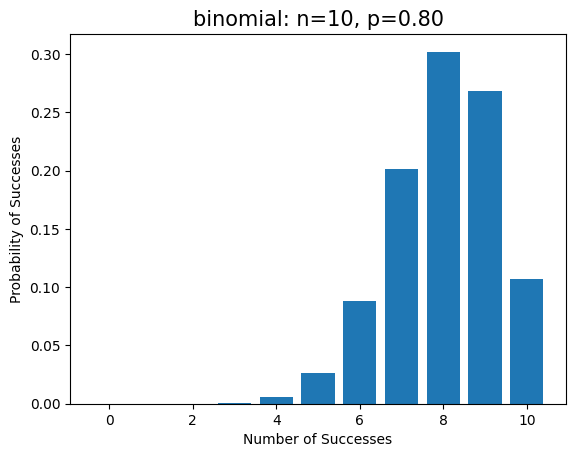

In [52]:
plt.bar(k, binomial)
plt.title("binomial: n=%i, p=%.2f" %(n,p), fontsize=15)
plt.xlabel("Number of Successes")
plt.ylabel("Probability of Successes")
plt.show()

#probability of 1,2,3,...,10 people buying

In [53]:
binom.cdf(k=7, n=n, p=p) #cumulative density function calculates the probability of being <= X


0.3222004735999997

UNIFORM DISTRIBUTION THEORY

Discrete Uniform - can take finite number of (m) of values and each value has EQUAL probability

Example: Number of books sold assuming equal probability for all books

Continuous Uniform - random variable with equal probability that can take any value between a specified range

Example: Temperature in United states uniformly distributed from 12-17 deg F.


ppf() - used to calculate the percentile point given probability. works opposite of cdf().

Example: Given probability find the number that correlates with it. 

NORMAL DISTRIBUTION:
Z-score - tell you how far the value X is from the mean.

Z = (X - mean) / std 




In [54]:
sat_score = pd.read_csv("sat_score.csv")
sat_score.describe()


,student_id,score
count,1000.000000,1000.000000
mean,500.500000,1007.460000
std,288.819436,204.426007
min,1.000000,288.000000
25%,250.750000,873.000000
50%,500.500000,1010.000000
75%,750.250000,1148.000000
max,1000.000000,1612.000000


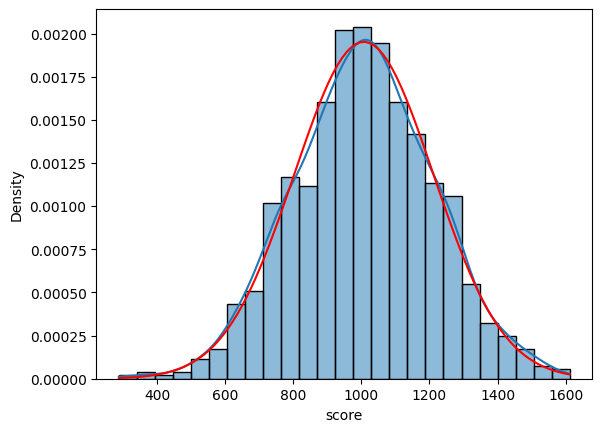

In [55]:
from scipy.stats import norm

mu = sat_score["score"].mean()
sigma = sat_score["score"].std()
density = pd.DataFrame()
density["x"] = np.linspace(sat_score["score"].min() - .01, sat_score["score"].max() + .01, 100)
density["pdf"] = norm.pdf(density["x"], mu, sigma )

fig, ax = plt.subplots()
sns.histplot(sat_score["score"], ax=ax, kde = True, stat = "density")
ax.plot(density["x"], density["pdf"], color ="red") #normal distribution plot
plt.show()

0.10393774696096802


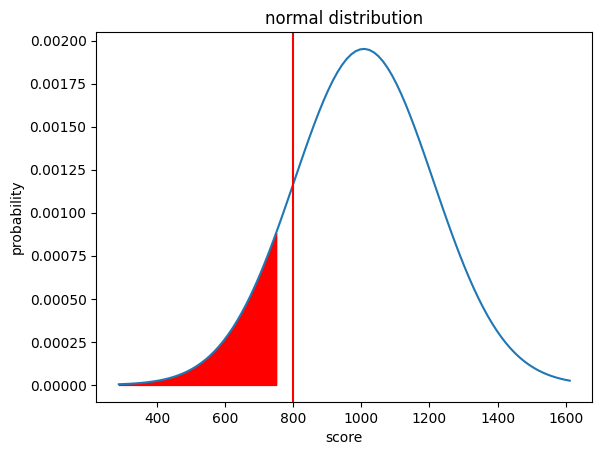

In [56]:
x = 750
prob_less_than_x = norm.cdf(x, mu, sigma)
print(prob_less_than_x)
plt.plot(density["x"], density["pdf"])
plt.axvline(x=800, c="r")
x1 = np.linspace(density["x"].min(), x, 50)
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color="r")
plt.xlabel("score")
plt.ylabel("probability")
plt.title("normal distribution")
plt.show()

0.07621063272885598


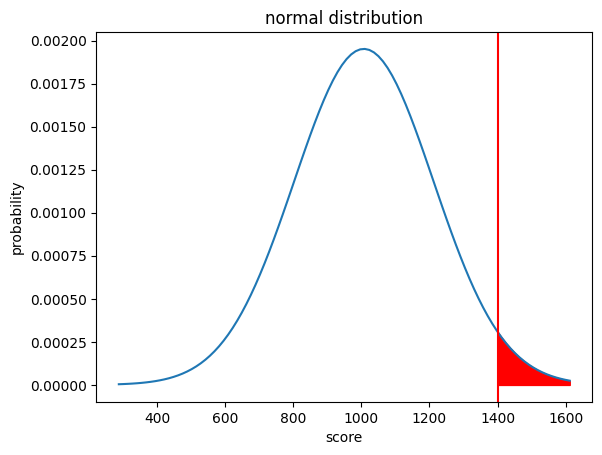

In [57]:
prob_greater_than_1400 = 1 - norm.cdf(1300, mu, sigma)
print(prob_greater_than_1400)
plt.plot(density["x"], density["pdf"])
plt.axvline(x=1400, c="r")
x1 = np.linspace(1400, density["x"].max(), 50)
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color="r")
plt.xlabel("score")
plt.ylabel("probability")
plt.title("normal distribution")
plt.show()

90th Percentile Calculation

In [58]:
score_90th_percentile = norm.ppf(.90, mu, sigma)
print("minimum score to get 90th percentile is:", score_90th_percentile)

minimum score to get 90th percentile is: 1269.4424694794877


CENTRAL LIMIT THEOREM - states that if we indepdently draw multiple samples from a population. take mean of each sample and plot these, then the plot will tend to normal distrbution as the size of sample increases, REGARDLESS of the shape of the population distribution. 

Lets check CLT on uniform distribution

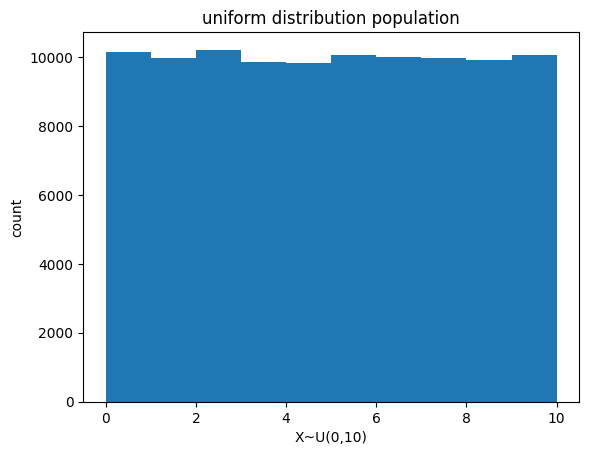

In [59]:
from scipy.stats import uniform

#sets seed for repdocubility
np.random.seed(1)

#creating a uniform distribution population of size 100000
uniform_pop = uniform.rvs(0, 10, size=100000)
#visualziing the uniform distribution

plt.hist(uniform_pop)
plt.title("uniform distribution population")
plt.xlabel("X~U(0,10)")
plt.ylabel("count")
plt.show()

draw sample size of n= 5, number of samples = 500
draw 500 samples of sample size 5

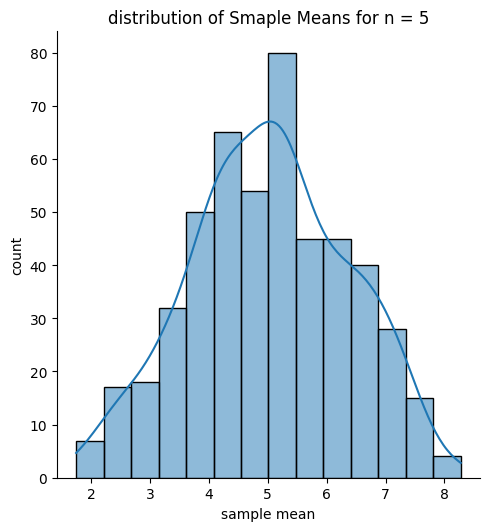

In [60]:
np.random.seed(1)
n=5
sample_means = []
for k in range(500):
    #draw a sample of size n
    sample = np.random.choice(uniform_pop, size=n)

    #calculate the sampel mean
    sample_mean = np.mean(sample)

    #append the sample mean to the sample_means list
    sample_means.append(sample_mean)
#plot the history of sample means
sns.displot(sample_means, kde=True)
plt.title("distribution of Smaple Means for n = " + str(n))
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()


We see that a sample size of 5 is still not normallly distributed, close though

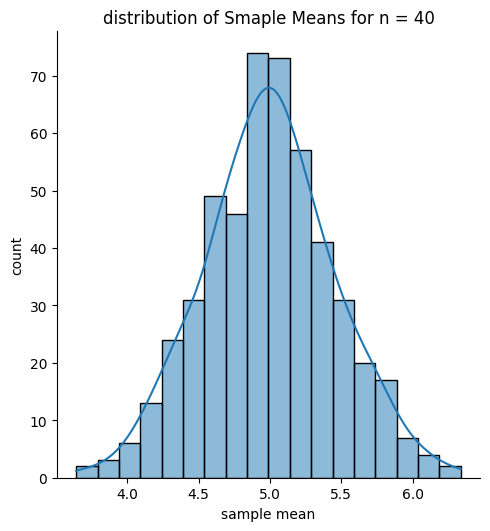

In [61]:
np.random.seed(1)
n=40 #change the sample size to 15 instead of 5
sample_means = []
for k in range(500):
    #draw a sample of size n
    sample = np.random.choice(uniform_pop, size=n)

    #calculate the sampel mean
    sample_mean = np.mean(sample)

    #append the sample mean to the sample_means list
    sample_means.append(sample_mean)
#plot the history of sample means
sns.displot(sample_means, kde=True)
plt.title("distribution of Smaple Means for n = " + str(n))
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()

A sample size of 30 is enough to assume a normal distribution. 

what the CLT lets you do is assume a NORMAL DISTRIUBTION even if the parent/population data is NOT NORMAL. 

EXPONENTIAL DISTRIBUTION - often use to determine lifetime of products given random events. 

Example: how long will a lightbuilt last given random events. 

Point of this is to show that the parent distribution is defintely NOT NORMALLY DISTRIBUTED. 

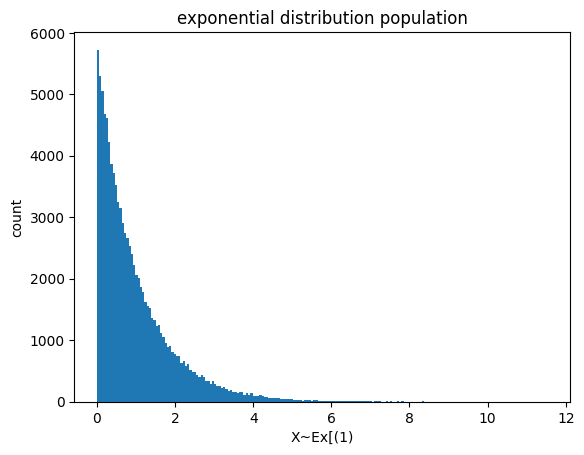

In [62]:
from scipy.stats import expon
#sets seed for repdocubility
np.random.seed(1)

#creating a uniform distribution population of size 100000
exp_pop = expon.rvs(size=100000)
#visualziing the uniform distribution

plt.hist(exp_pop, 200)
plt.title("exponential distribution population")
plt.xlabel("X~Ex[(1)")
plt.ylabel("count")
plt.show()

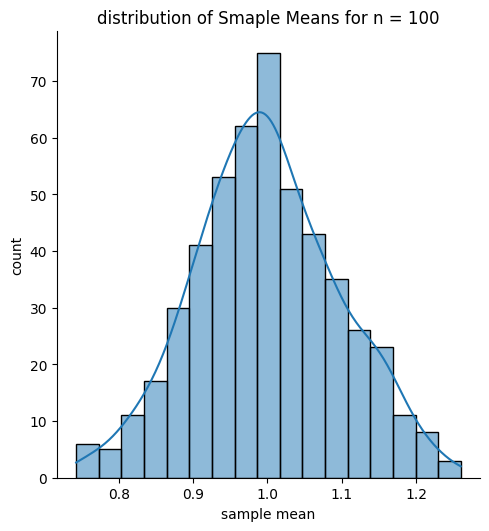

In [63]:
np.random.seed(1)
n=100 #change the sample size to 15 instead of 5
sample_means = []
for k in range(500):
    #draw a sample of size n
    sample = np.random.choice(exp_pop, size=n)

    #calculate the sampel mean
    sample_mean = np.mean(sample)

    #append the sample mean to the sample_means list
    sample_means.append(sample_mean)
#plot the history of sample means
sns.displot(sample_means, kde=True)
plt.title("distribution of Smaple Means for n = " + str(n))
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()

ESTIMATION WHEN THE STANDARD DEVIATION OF THE POPULATION IS KNOWN

In [75]:
from scipy.stats import norm
x_bar, sigma = 110,7
n = 50
np.round(norm.interval(.95, loc=x_bar, sca le=sigma / np.sqrt(n)), 2)

array([108.06, 111.94])

ESTIMATION - make inference about a population paremeter based on a sample statistic

Point estimation - use a sample statistic to represent the population 

Example: Population mean as estimated from the sample mean is 40.

Interval Estimation - use a ranage of values within which the populaiton paremeter lies with some (x% confidence)

Example: Population mean should lie between 38-42 with 95% confidence (x = 95%)

100% confidence level is NOT use din confidence interval calcualtion because it would mean that 


standard deviation of sample- variability in sample

standard error - variability in average of samples (sigma / sqrt(n))

T-DISTRIBUTION - used when the population standard deviation is not known. 

In [72]:
from scipy.stats import t

# set the values of sample mean and sample deviation
x_bar, s = 160.9, 6

# set the value of sample size and degrees of freedom
n = 50
k = n-1

# construct the confidence interval
np.round(t.interval(.95, df=k, loc=x_bar, scale=s / np.sqrt(n)), 2)


array([159.19, 162.61])

In [77]:
#delivry time example: 
mu, sigma = 5, 1.3
x_bar = 5.25
test_stat = (x_bar - mu) / (sigma / np.sqrt(45))
test_stat #z-score

1 - norm.cdf(test_stat) #probability of being larger than 5.25

0.09851852092578695

Since this value ~10% is more than 5% we reject the null hypothesis even if it is true

5% alpha means that we are 95% confident that our test results are significant and not by chance.

1. Rejection region approach
    1. we choose a value of level of significance (alpha)
    2. We find the rejection region in the graph
    
    1 SIDED APPROACH

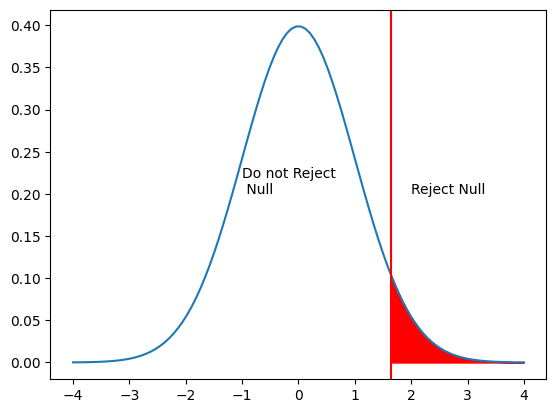

In [79]:
critical_val = norm.ppf(1-.05) #finding the value based on level of significance
critical_val

x = np.linspace(-4,4, 100)
plt.plot(x,norm.pdf(x,0,1))
plt.axvline(x = critical_val, c = 'r')
x1 = np.linspace(critical_val, 4, 50)
plt.fill_between(x1, norm.pdf(x1, 0, 1), color = 'r')
plt.annotate ('Reject Null', (2, .2))
plt.annotate('Do not Reject\n Null', (-1, .2))
plt.show()


2 SIDED APPROACH


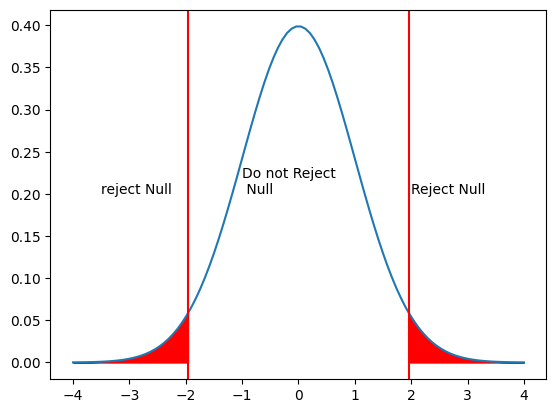

In [81]:
critical_val_lower = norm.ppf(1-(.05/2)) #finding the value based on level of significance
critical_val_upper = norm.ppf(.05/2)

x = np.linspace(-4,4, 100)
plt.plot(x,norm.pdf(x,0,1))
plt.axvline(x = critical_val_lower, c = 'r')
x1 = np.linspace(critical_val_lower, 4, 50)
plt.fill_between(x1, norm.pdf(x1, 0, 1), color = 'r')
plt.axvline(x = critical_val_upper, c='r')
x1 = np.linspace(-4, critical_val_upper, 50)
plt.fill_between(x1, norm.pdf(x1, 0, 1), color = 'r')
plt.annotate ('Reject Null', (2, .2))
plt.annotate('reject Null', (-3.5, .2))
plt.annotate('Do not Reject\n Null', (-1, .2))
plt.show()


In [84]:
mu, sigma = 502, 115
x_bar = 400
x_bar_2 = 590
test_stat_1 = (x_bar - mu) / (sigma)
test_stat_2 = (x_bar_2 - mu) /(sigma)
test_stat #z-score

one = 1 - norm.cdf(test_stat_1) #probability of
two = 1- norm.cdf(test_stat_2)

one - two

0.5903777927789047

In [91]:
import scipy.stats as st

x1 = 1 - st.norm.cdf(400, loc = 502, scale = 115)
x2 = 1 - st.norm.cdf(590, loc = 502, scale = 115)
x1 - x2

0.5903777927789047